# information theory

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# entropy - uncertainty.... how much can you learn from measuring 

np.log2(4) # 2**x = N, x == 1


2.0

In [4]:
n = 16 # 16 possible outcomes 
p = 1/n

-np.log2(p) # log2(1) - log2(n)

4.0

In [5]:
n = 16

H = 0
for i in np.arange(n):
    H += -((1/n) * np.log2(1/n)) # normalizing for non-uniform distribution
print(H)


4.0


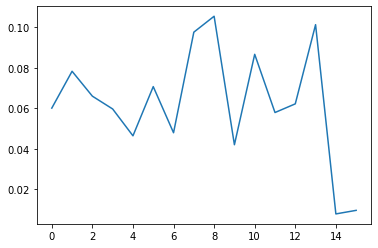

3.8279550259738846


In [6]:
np.random.seed(0)

n = 16

px = np.random.rand(n)
px /= np.sum(px)

# numpy way...
# equivalent of what was in the for loop
H = -np.sum(px * np.log2(px))

plt.plot(px)
plt.show()

print(H)
# entropy lower than 4 because moving away from 1/16
# less uncertainty in the data

In [13]:
# generating some data that we can change the dependence 
np.random.seed(0)

N = 1000 

x = np.round(np.random.rand(N))
y = np.round(np.random.rand(N))

# introduce some dependence 
p = .95 # proportion of shared data/overlap
idx = int(p*N) # 95% of x and y to be identical 

y[:idx] = x[:idx]

# now figure out px - each poss outcome
px = np.zeros(2)
px[0] = np.sum(x) / N # probability of heads  
px[1] = 1 - px[0] # probability of tails
print(px)
Hx = -np.sum(px*np.log2(px))
print(Hx)
Hxy=0
# possible values of y
for i in np.arange(2):
    py = np.sum(y==i) / N
    tmp = 0
    for j in np.arange(2):
        px_y = np.sum((x==j)&(y==i))/np.sum(y==i)
        tmp += -(px_y * np.log2(px_y))
    Hxy += (py * tmp)
MI = Hx - Hxy
print(MI)

[0.483 0.517]
0.9991659615315873
0.8149294036605923


In [18]:
from sklearn.metrics import mutual_info_score

MI = mutual_info_score(x,y) * np.log2(np.e)

print(MI)

0.8149294036605925


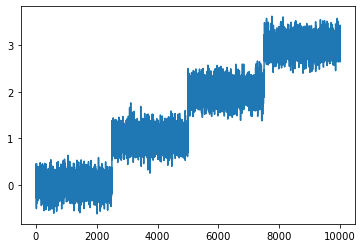

In [41]:
np.random.seed(0)

N = 10000

num_conds = 4
conds = np.repeat(np.arange(4), N/num_conds)

# some continuous data
cond_means = [0, 1, 2, 3]
cond_stds = [.2, .2, .2, .2]

resp = []
for i in np.arange(num_conds):
    resp = np.hstack((resp, ((np.random.randn(int(N/num_conds)) * cond_stds[i]) + cond_means[i]))) # horizontal concatnation 


plt.plot(resp)
plt.show()


In [42]:
# take the continuous data and chop into 20 bins/turn it into discrete var
nbins = 20
b, edges = np.histogram(resp, bins = nbins)
bin_y = np.digitize(resp, edges)

print(bin_y[:10])
print(resp[:10])

MI = mutual_info_score(conds, bin_y) * np.log2(np.e)
print(MI)

[5 4 4 6 5 3 4 3 3 4]
[ 0.35281047  0.08003144  0.1957476   0.44817864  0.3735116  -0.19545558
  0.19001768 -0.03027144 -0.02064377  0.0821197 ]
1.952526251971003
